In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import math
from os import listdir
from os.path import isfile, join

In [369]:
specs = dict()
specs["Aleks"] = "13th Gen Intel(R) Core(TM) i9-13900H, 2600 Mhz"
specs["Aleks2"] = "13th Gen Intel(R) Core(TM) i9-13900H, 2600 Mhz"
specs["Oliver"] = "12th Gen Intel(R) Core(TM) i7-12700H 2.30 GHz"
specs["Philippa"] = "AMD Ryzen 3 5300U with Radeon Graphics 2.60 GHz"
specs["Dani"] = "13th Gen Intel(R) Core(TM) i5 with irisXE graphics"
specs["Dani_Macbook"] = "Intel(R) Core(TM) i7 with intel UHD graphics"

In [370]:
mypath= "."
csvfiles = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f[-4:]==".csv")]
csvfiles

['Aleks2_results.csv',
 'Aleks_results.csv',
 'CPU_results (1).csv',
 'Dani_Macbook_results.csv',
 'Dani_results.csv',
 'Oliver_results.csv',
 'Philippa_results.csv',
 'T4 GPU_results (1).csv']

In [371]:
df = None
dfs = []

for csvfile in csvfiles:
    new_df = pd.read_csv(csvfile)
    print(f"{csvfile}:\t{len(new_df)}")

    if df is None:
        df = new_df
    else:
        df = pd.concat([df, new_df], ignore_index=True)

    dfs.append(new_df)

    print(len(df))

df

Aleks2_results.csv:	1613
1613
Aleks_results.csv:	843
2456
CPU_results (1).csv:	88
2544
Dani_Macbook_results.csv:	842
3386
Dani_results.csv:	2400
5786
Oliver_results.csv:	720
6506
Philippa_results.csv:	300
6806
T4 GPU_results (1).csv:	155
6961


,Unnamed: 0,model,batch_size,epochs,dataset_size,time_to_train,time_to_retrain,time_to_predict,accuracy,name
0,0,RNN,128,1,15000,2.952457,0.783139,0.932045,0.6436,Aleks2
1,1,FNN,128,1,15000,1.606068,0.903214,0.477152,0.8656,Aleks2
2,2,CNN,128,1,15000,2.090442,1.190924,0.500040,0.9352,Aleks2
3,3,RNN,128,1,15600,2.567901,0.670870,0.736587,0.7505,Aleks2
4,4,FNN,128,1,15600,1.853802,0.984637,0.822216,0.8853,Aleks2
...,...,...,...,...,...,...,...,...,...,...
6956,150,RNN,128,1,45000,12.838315,2.099783,2.688983,0.8928,T4 GPU
6957,151,FNN,128,1,45000,5.718172,2.855448,0.894842,0.9016,T4 GPU
6958,152,CNN,128,1,45000,6.574182,2.906103,1.009092,0.9663,T4 GPU
6959,153,RNN,128,1,45600,8.558773,1.829297,2.180620,0.8968,T4 GPU


In [372]:
def filter_df_by_column_std(df, column):
    filtered_df = None
    for name in df.name.unique():
        for model in df.model.unique():
            tdf = df[(df.name == name) & (df.model == model)]
            std = tdf[column].std()
            mean = tdf[column].mean()
        
            upper_bound = mean + (1.5*std)
            lower_bound = mean - (1.5*std)
        
            fdf = tdf[(lower_bound <= tdf[column]) & (tdf[column] <= upper_bound)]

            if filtered_df is None:
                filtered_df = fdf.copy()
            else:
                filtered_df = pd.concat([filtered_df, fdf], ignore_index=True)
                
    return filtered_df

In [373]:
filtered_df = filter_df_by_column_std(df, "time_to_train")
filtered_df = filter_df_by_column_std(filtered_df, "time_to_retrain")
filtered_df = filter_df_by_column_std(filtered_df, "time_to_predict")

for i in range(len(dfs)):
    dfs[i] = filter_df_by_column_std(dfs[i], "time_to_train")
    dfs[i] = filter_df_by_column_std(dfs[i], "time_to_retrain")
    dfs[i] = filter_df_by_column_std(dfs[i], "time_to_predict")

In [374]:
filtered_df.columns

Index(['Unnamed: 0', 'model', 'batch_size', 'epochs', 'dataset_size',
       'time_to_train', 'time_to_retrain', 'time_to_predict', 'accuracy',
       'name'],
      dtype='object')

(array([1683., 1260., 1200.,  725.,  480.,  480.,  413.,  240.,  240.,
         240.]),
 array([   0. ,  239.9,  479.8,  719.7,  959.6, 1199.5, 1439.4, 1679.3,
        1919.2, 2159.1, 2399. ]),
 <BarContainer object of 10 artists>)

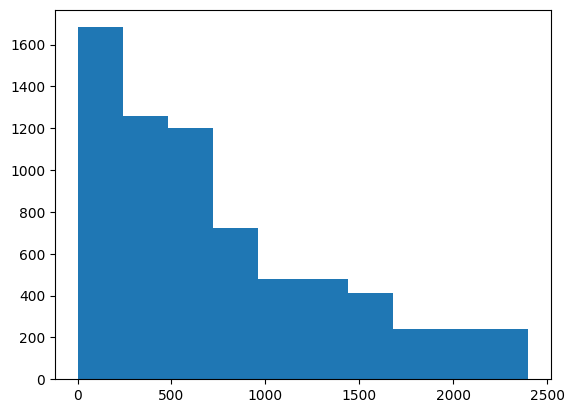

In [375]:
plt.hist(df['Unnamed: 0'])

(array([756., 657., 747., 636., 732., 611., 680., 566., 634., 942.]),
 array([15000., 19500., 24000., 28500., 33000., 37500., 42000., 46500.,
        51000., 55500., 60000.]),
 <BarContainer object of 10 artists>)

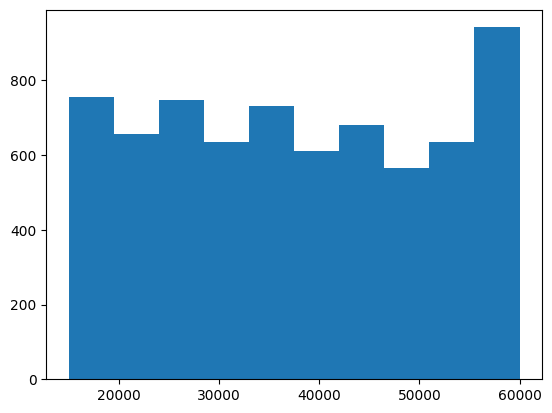

In [376]:
plt.hist(df.dataset_size)

43.0998375415802


(array([3.440e+03, 1.506e+03, 3.210e+02, 7.000e+01, 6.900e+01, 4.900e+01,
        2.000e+01, 8.000e+00, 3.000e+00, 7.000e+00]),
 array([ 1.46698642,  5.63027153,  9.79355664, 13.95684175, 18.12012687,
        22.28341198, 26.44669709, 30.6099822 , 34.77326732, 38.93655243,
        43.09983754]),
 <BarContainer object of 10 artists>)

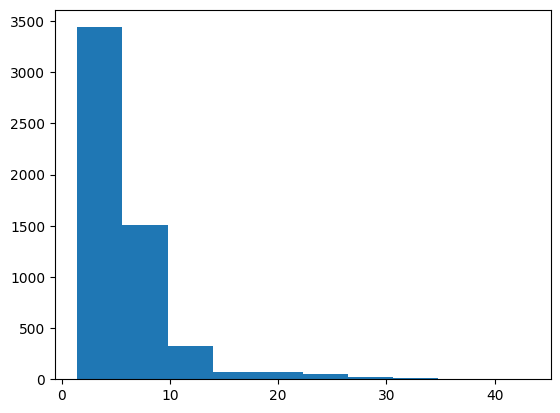

In [377]:
print(filtered_df["time_to_train"].max())
plt.hist(filtered_df["time_to_train"])

(array([4.846e+03, 4.650e+02, 8.800e+01, 5.000e+01, 2.300e+01, 6.000e+00,
        1.300e+01, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.5873611 ,  7.14280839, 13.69825568, 20.25370297, 26.80915027,
        33.36459756, 39.92004485, 46.47549214, 53.03093944, 59.58638673,
        66.14183402]),
 <BarContainer object of 10 artists>)

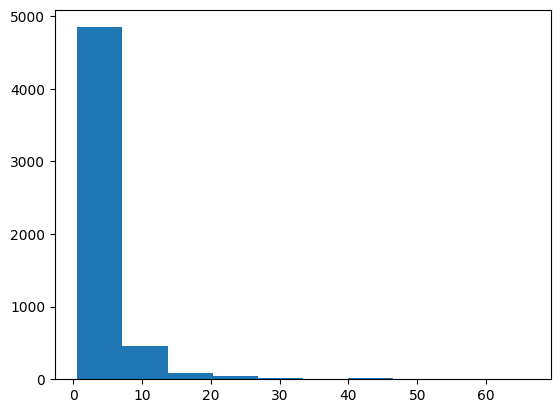

In [378]:
plt.hist(filtered_df["time_to_retrain"])

(array([1488., 2074., 1197.,  357.,  167.,   56.,  125.,    7.,    8.,
          14.]),
 array([0.3688004 , 0.73946726, 1.11013412, 1.48080099, 1.85146785,
        2.22213471, 2.59280157, 2.96346843, 3.33413529, 3.70480216,
        4.07546902]),
 <BarContainer object of 10 artists>)

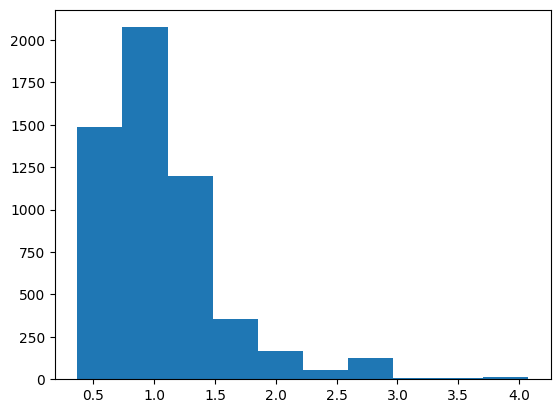

In [379]:
plt.hist(filtered_df["time_to_predict"])

In [380]:
def plot_by_col(x_col, y_col, c_col):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    handels = []
    labels = []
    
    for value in filtered_df[c_col].unique():
        dft = filtered_df[filtered_df[c_col] == value]
        handels.append(ax1.scatter(dft[x_col], dft[y_col]))
        labels.append(value)
    
    ax1.legend(handles=handels, labels=labels)
    fig.suptitle(f"{y_col} vs {x_col}")

In [381]:
def add_subplot(df, fig, x_col, y_col, c_col, xlim=None, ylim=None):

    num_axes = len(fig.axes)

    rows = cols = math.ceil(math.sqrt(num_axes + 1))

    gs = gridspec.GridSpec(rows, cols)

    for i in range(num_axes):
        fig.axes[i].set_position(gs[i].get_position(fig))
        fig.axes[i].set_subplotspec(gs[i])

    ax1 = fig.add_subplot(gs[num_axes])
    handels = []
    labels = []
    
    for value in df[c_col].unique():
        dft = df[df[c_col] == value]
        handels.append(ax1.scatter(dft[x_col], dft[y_col]))
        labels.append(value)
    
    ax1.legend(handles=handels, labels=labels)

    if xlim is not None:
        ax1.set(xlim=xlim)

    if ylim is not None:
        ax1.set(ylim=ylim)

    ax1.set_title(f"{y_col} vs {x_col}")

In [382]:
def get_specs(name):
    if name in specs.keys():
        return specs[name]
    else:
        return f"Unknown System Specs ({name})"

In [383]:
def plot_model_comparisons(df_cur, title=None):

    if title is None:
        name = df_cur["name"][1]
        title = get_specs(name)
    
    fig = plt.figure(figsize=(12,10))
    fig.suptitle(title)
    fig.subplots_adjust(top=0.92)
    add_subplot(df_cur, fig, "dataset_size", "time_to_train", "model")
    add_subplot(df_cur, fig, "dataset_size", "time_to_predict", "model")
    add_subplot(df_cur, fig, "dataset_size", "time_to_retrain", "model")
    add_subplot(df_cur, fig, "accuracy", "time_to_train", "model")
    add_subplot(df_cur, fig, "accuracy", "time_to_predict", "model")
    add_subplot(df_cur, fig, "accuracy", "dataset_size", "model")
    fig

In [384]:
def plot_system_comparisons(df):
    fig = plt.figure(figsize=(12,10))
    fig.suptitle("System Comparison")
    fig.subplots_adjust(top=0.92)
    add_subplot(df, fig, "dataset_size", "time_to_train", "name")
    add_subplot(df, fig, "time_to_predict", "time_to_train", "name")
    add_subplot(df, fig, "time_to_retrain", "time_to_train", "name")

    legend_ax = fig.add_subplot(224)

    legend_ax.axis("off")

    previous_legend = fig.axes[0].get_legend()

    handles = previous_legend.legend_handles
    labels = [get_specs(name.get_text()) for name in previous_legend.get_texts()]

    legend_ax.legend(handles=handles, labels=labels, loc="center")

    for ax in fig.axes[:-1]:
        ax.get_legend().remove()

    fig

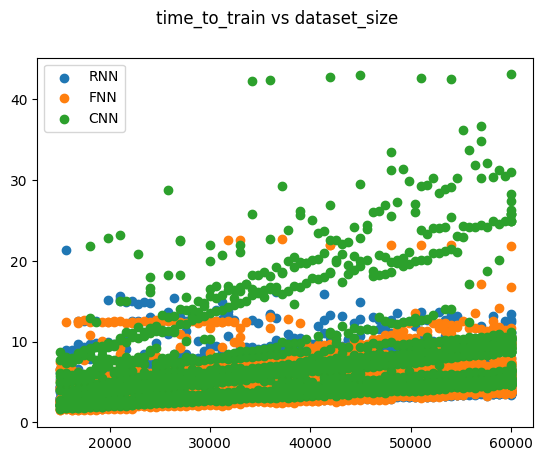

In [385]:
plot_by_col("dataset_size", "time_to_train", "model")

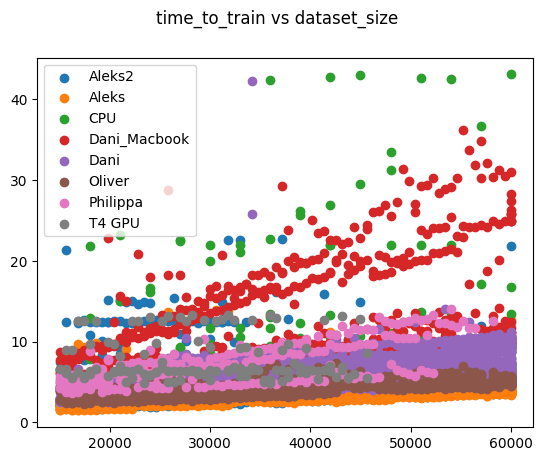

In [386]:
plot_by_col("dataset_size", "time_to_train", "name")

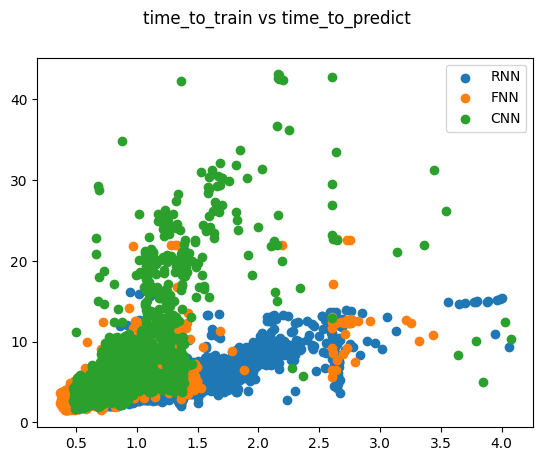

In [387]:
plot_by_col("time_to_predict", "time_to_train", "model")

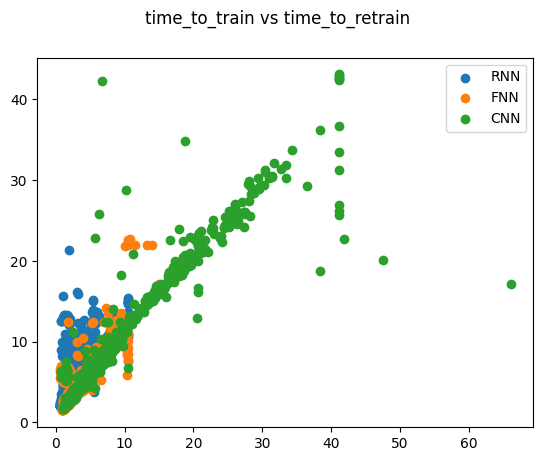

In [388]:
plot_by_col("time_to_retrain", "time_to_train", "model")

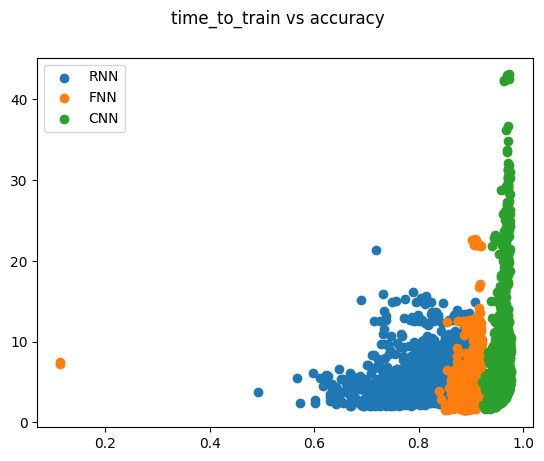

In [389]:
plot_by_col("accuracy", "time_to_train", "model")

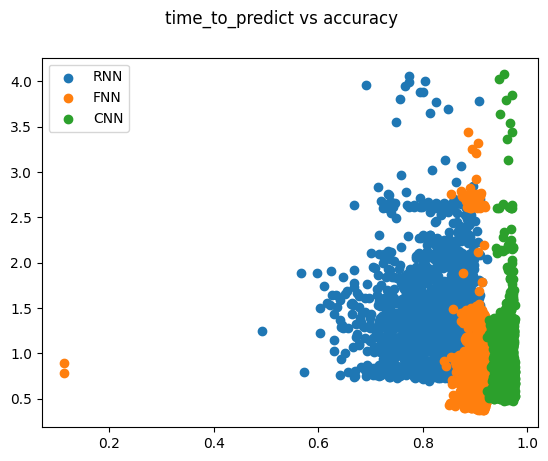

In [390]:
plot_by_col("accuracy", "time_to_predict", "model")

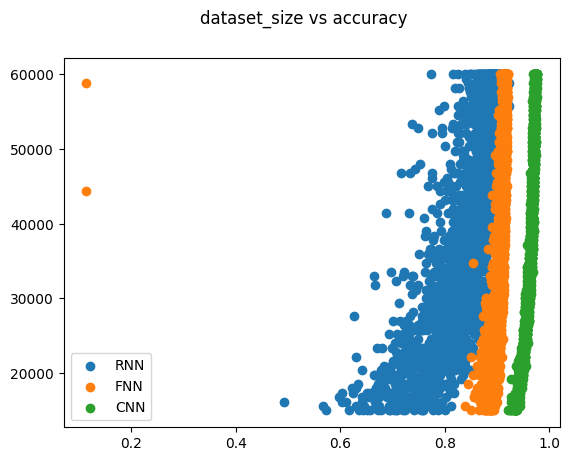

In [391]:
plot_by_col("accuracy", "dataset_size", "model")

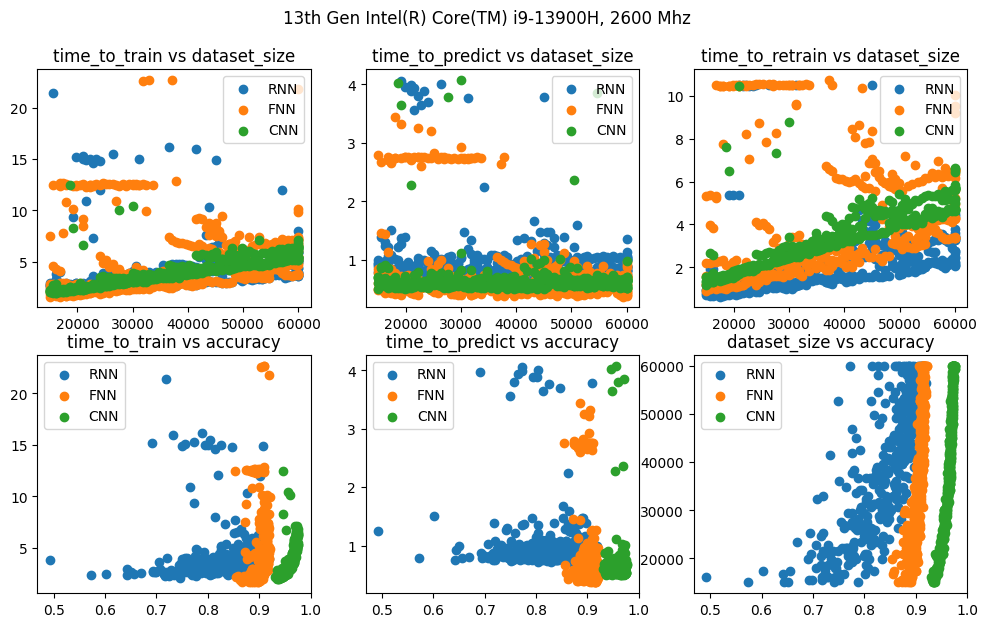

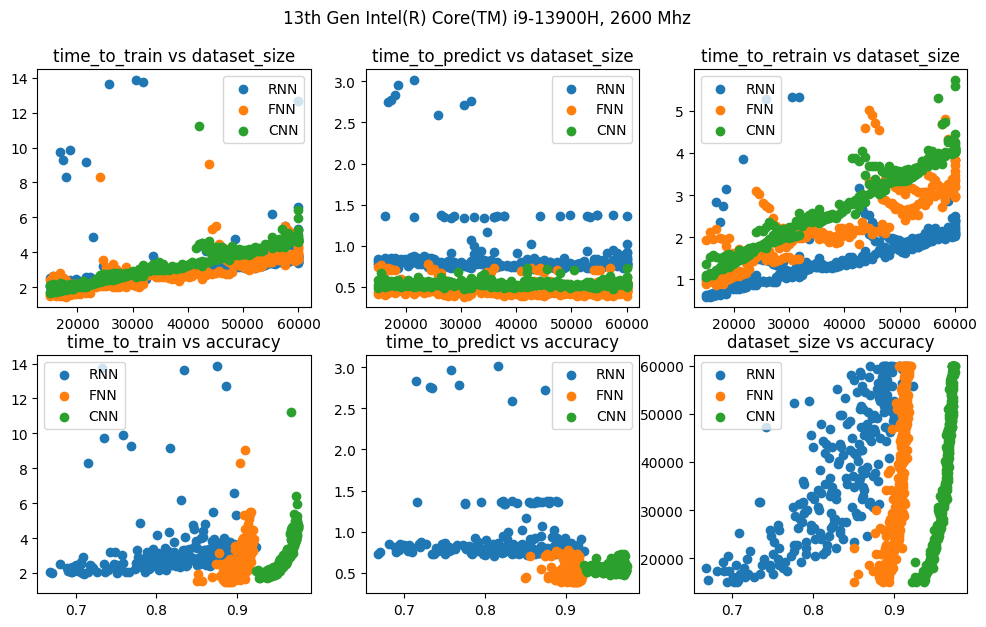

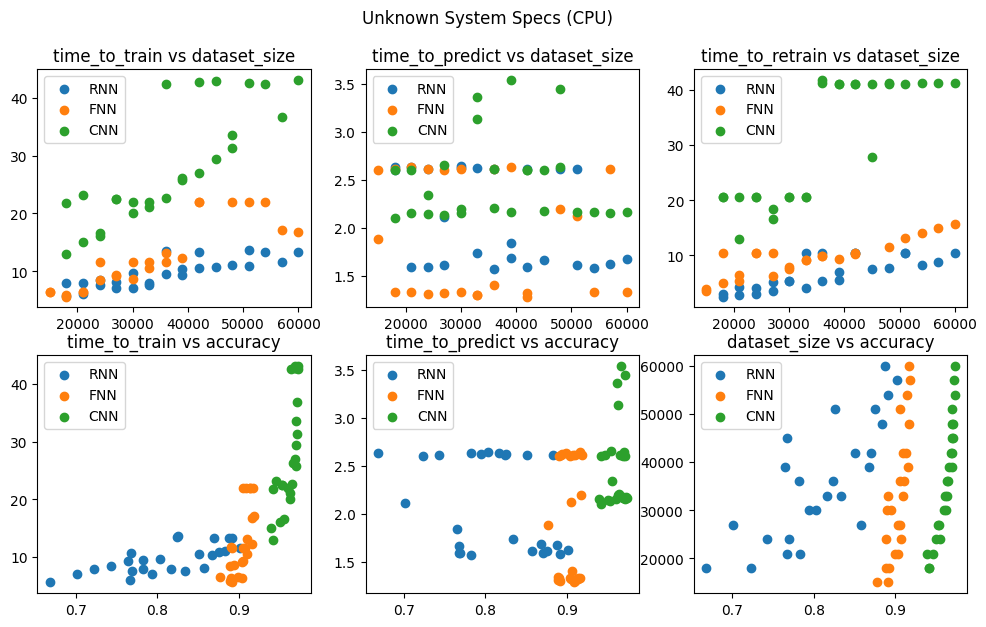

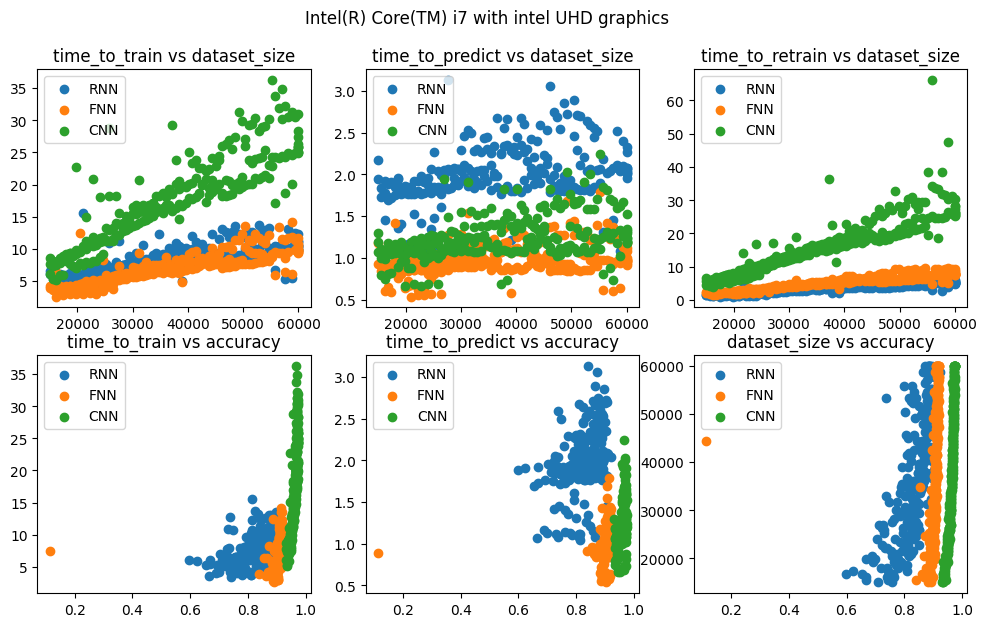

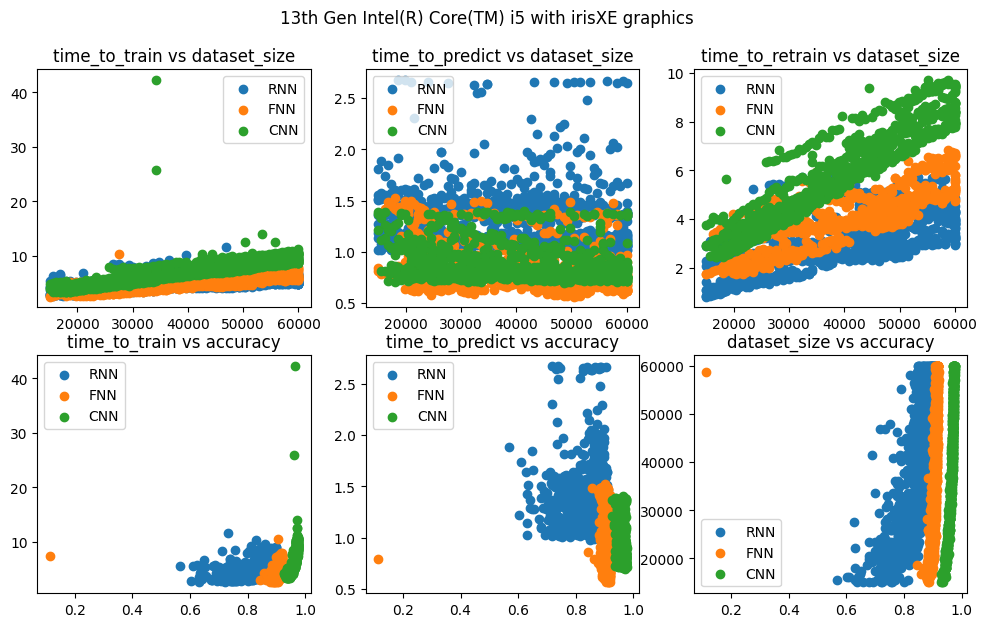

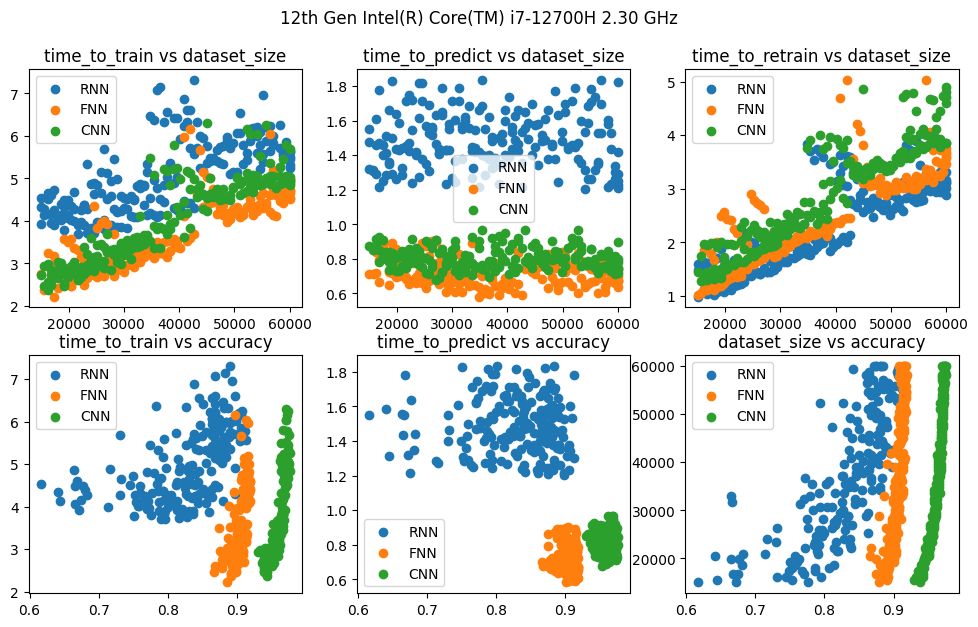

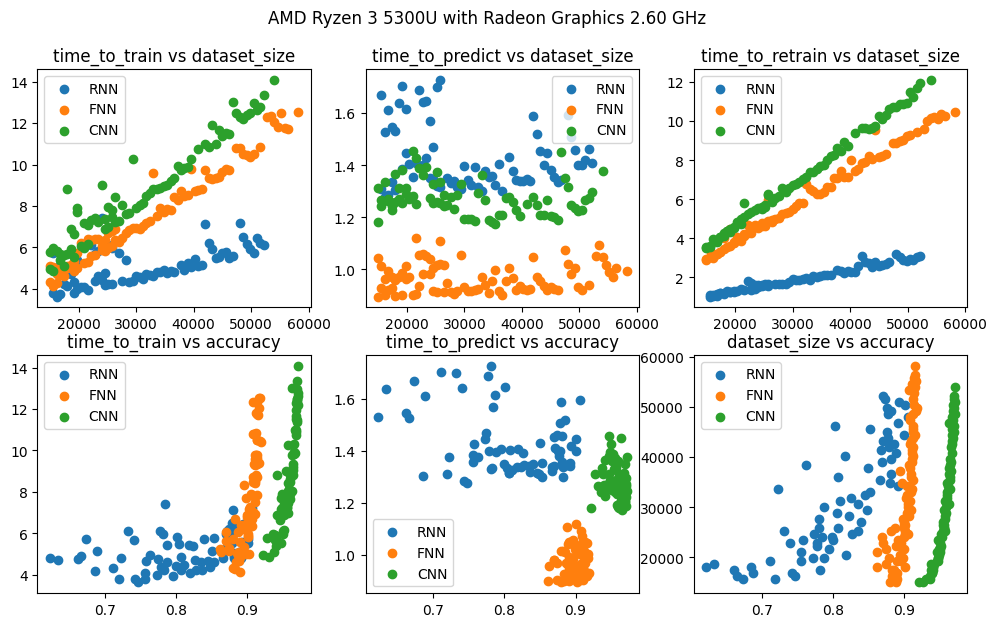

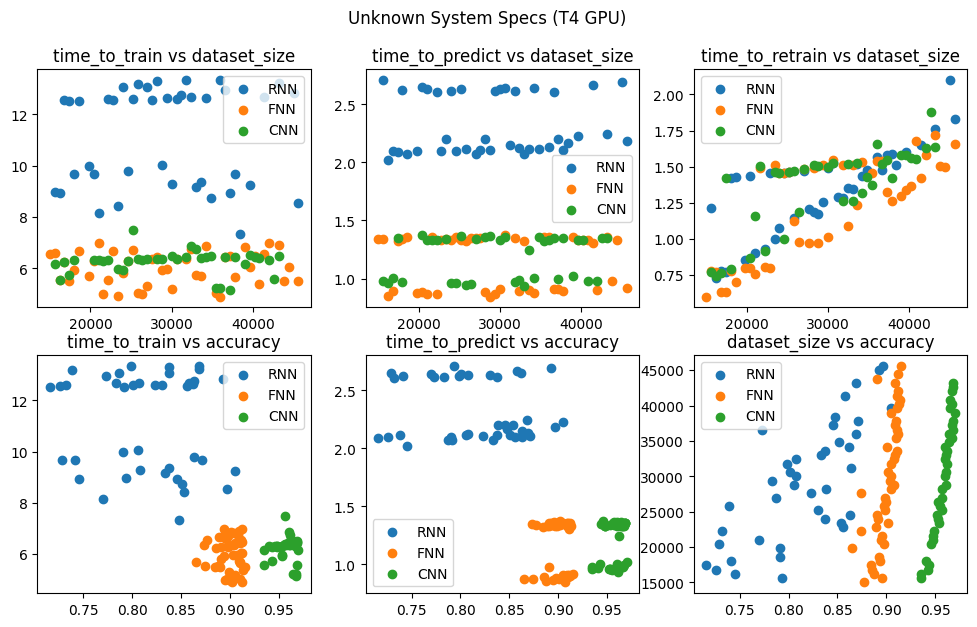

In [392]:

for i in range(len(dfs)):
    plot_model_comparisons(dfs[i])


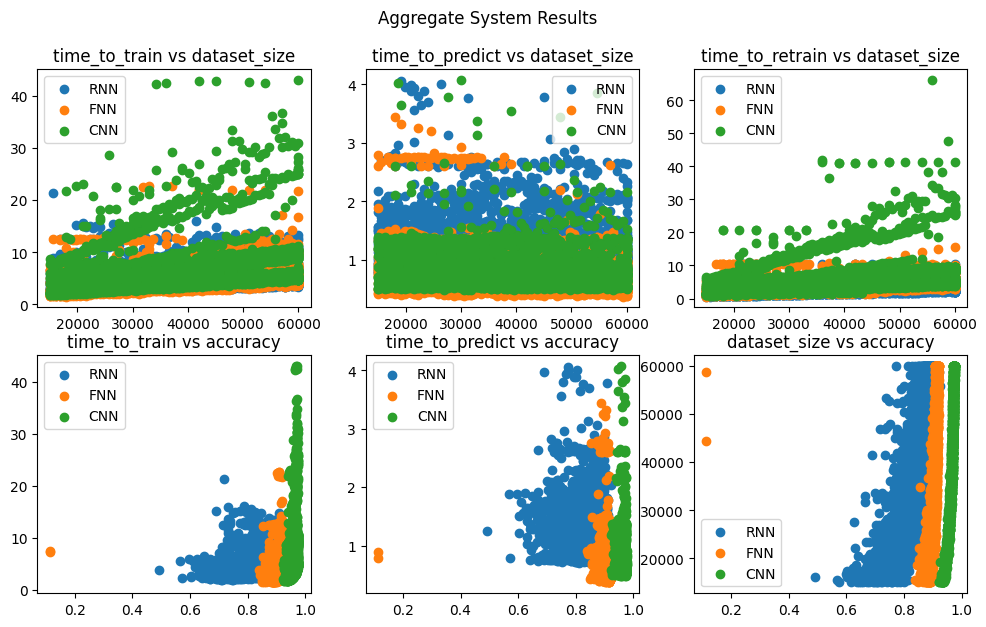

In [393]:
plot_model_comparisons(filtered_df, "Aggregate System Results")

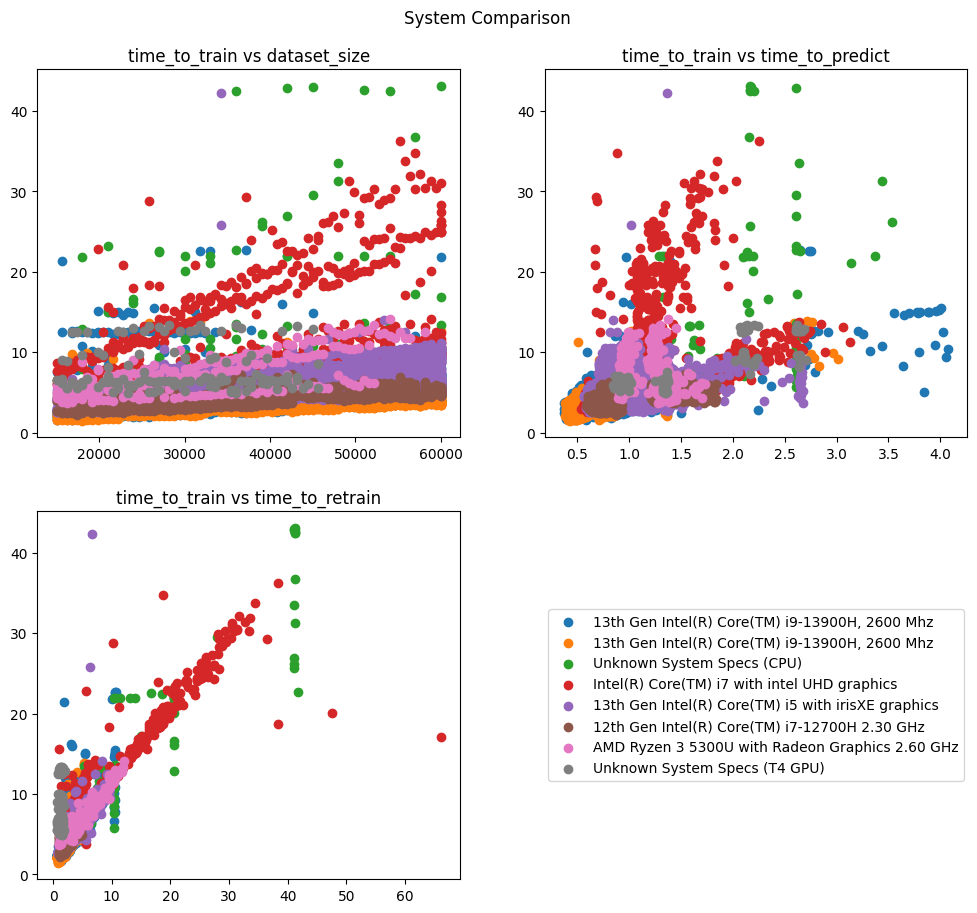

In [394]:
plot_system_comparisons(filtered_df)